In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')

In [2]:
from sklearn.datasets import make_classification

X00, y00 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_classes=2, n_clusters_per_class=1, class_sep=0.8, 
                               weights=[0.99, 0.01], random_state=0)

from sklearn.model_selection import train_test_split

X0, X_test, y0, y_test = train_test_split(X00, y00, test_size=0.25)

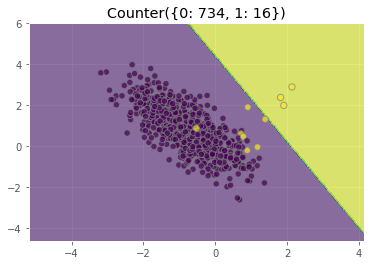

In [3]:
from collections import Counter
from sklearn.svm import SVC

x1_min = X00[:, 0].min() - 2
x1_max = X00[:, 0].max() + 2
x2_min = X00[:, 1].min() - 2
x2_max = X00[:, 1].max() + 2

def plot_samples(X=None, y=None):
    XX, YY = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]
    if X is None:
        X = X0
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.title(Counter(y0))
    else:
        plt.subplot(121)
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y0))
        plt.subplot(122)
        model = SVC(kernel="linear").fit(X, y)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y))
        plt.tight_layout()
    plt.show()
    
    return model.predict(X)
    
y_pred = plot_samples()

In [4]:
from sklearn.metrics import classification_report

print(classification_report(y0, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       734
          1       1.00      0.19      0.32        16

avg / total       0.98      0.98      0.98       750



### 패키지 설치

In [ ]:
# !pip install -U imbalanced-learn

## 1. 언더 샘플링

- 클래스의 비율이 높은 데이터의 개수를 클래스의 비율이 낮은 데이터의 개수와 맞춘다

In [5]:
from imblearn.under_sampling import *

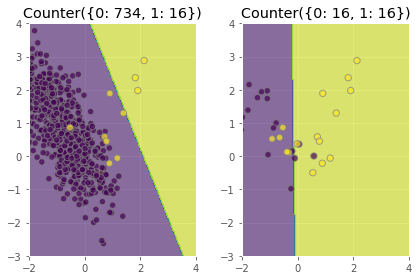

In [6]:
X, y = RandomUnderSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [7]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.81      0.76        16
          1       0.79      0.69      0.73        16

avg / total       0.75      0.75      0.75        32



## 2. 오버 샘플링

* `RandomOverSampler`: random sampler
    - 단순 중복 추출
* `SMOTE`: Synthetic Minority Over-sampling Technique
    - SMOTE는 먼저 분류 개수가 적은 쪽의 데이터의 샘플을 취한 뒤 이 샘플의 k 최근접 이웃k nearest neighbor을 찾는다. 그리고 현재 샘플과 이들 k개 이웃 간의 차difference를 구하고, 이 차이에 0 ~ 1 사이의 임의의 값을 곱하여 원래 샘플에 더한다. 이렇게 만든 새로운 샘플을 훈련 데이터에 추가한다. 결과적으로 SMOTE는 기존의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 점들을 추가하는 방식으로 동작한다.


In [8]:
from imblearn.over_sampling import *

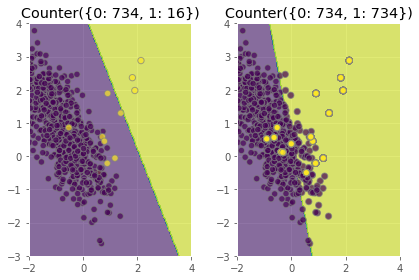

In [9]:
X, y = RandomOverSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [10]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.87      0.77       734
          1       0.82      0.60      0.69       734

avg / total       0.75      0.73      0.73      1468



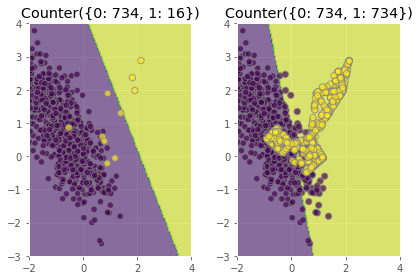

In [11]:
X, y = SMOTE(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [12]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.87      0.78       734
          1       0.83      0.64      0.72       734

avg / total       0.77      0.75      0.75      1468

